# **Netflix Decoded: Exploring the World's Streaming Giant**

## **Executive Summary**
This analysis explored the structure and trends of Netflix’s global content catalog using Exploratory Data Analysis (EDA) techniques. The focus was on understanding how Netflix curates its content in terms of types, growth patterns, genres, geographic origins, and durations. The dataset reveals valuable insights into Netflix's strategic content decisions, market expansion efforts, and consumption patterns.

Key findings include:
1. A significant dominance of movies over TV shows, highlighting Netflix’s focus on short-form content.

2. A peak in content expansion from 2016–2019, followed by a slowdown possibly linked to strategic recalibration or external factors like the pandemic.

3. A clear emphasis on international and hybrid genres, reflecting global market engagement.

4. Geographic diversity in content production, with emerging contributions from countries beyond the traditional Western film hubs.

5. A preference for standard feature film durations and short-run TV series, aligning with binge-watching behaviors and reduced content risk.


## **Background** 
In the era of digital entertainment, streaming platforms have transformed media consumption behaviors worldwide. Among them, Netflix stands as a global leader, with a vast, ever-evolving content catalog that serves millions of users across diverse geographies, cultures, and demographics.

With the growing competition in the streaming space—from Disney+, Amazon Prime Video, to regional players, understanding content trends, user preferences, and catalog composition has become vital. Netflix’s competitive edge increasingly relies on data-driven content strategies, ranging from content acquisition and localization to personalized recommendations and genre innovations.
## Objetives
The primary goal of this analysis is to explore and understand trends, patterns, and distributions within the Netflix catalog using data-driven techniques. 

- Analyze the Distribution of Content Types
- Track Netflix’s Content Growth Over Time
- Explore Genre and Category Trends
- Assess Geographic Content Distribution
- Study Content Duration and Length Patterns

## **Data  Munging**



In [1]:
# Load the data and inspect it
import pandas as pd
netflix_df = pd.read_csv("C:\\Users\\jdrew\\Datasets\\netflix_titles.csv")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [2]:
#check for duplicates
netflix_df.duplicated().sum()

0

**Finding/s:**
- There are no duplicates in this data.


In [3]:
#check the columns and data type
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Finding/s:**
- show_id is a unique identifier for each record
- listed_in is a confusing column name. change it into category
- the data type of date_added must be date
- duration column consists of two measurements: time and seasons.

In [4]:
#change column name
netflix_df.rename(columns={"listed_in":"category"}, inplace=True)
#change the data type of date_added
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip())

In [5]:
#check the data again
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  category      8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [6]:
#evaluate the completeness of the data
missing_val = netflix_df.isnull().sum()
missing_perc = round((missing_val / len(netflix_df))*100,2)

missing_df = pd.DataFrame({'No. of Missing Values':missing_val, 'Percentage (%)': missing_perc})
missing_df = missing_df.sort_values(by = 'Percentage (%)', ascending=False)
print(missing_df)

              No. of Missing Values  Percentage (%)
director                       2634           29.91
country                         831            9.44
cast                            825            9.37
date_added                       10            0.11
rating                            4            0.05
duration                          3            0.03
show_id                           0            0.00
type                              0            0.00
title                             0            0.00
release_year                      0            0.00
category                          0            0.00
description                       0            0.00


**Finding/s:**
- Drop rows that has missing values in date_added, rating, or duration because the missing percentage of these columns are lower thatn 5%.
- There are 29.91% missing in director's column, but we can fill it with 'Unknown' since it doesn't affect my analysis and answering the research questions.
- Flag and analyze the missingness in country and cast columns. Look for some patterns in the data and try to populate it.

In [7]:
#drop records that has null values in date_added, rating, or duration column
df_clnd = netflix_df.dropna(subset=['date_added', 'rating', 'duration']).copy()

print("Before:", netflix_df.shape)
print("After:", df_clnd.shape)

Before: (8807, 12)
After: (8790, 12)


In [8]:
#fill null values in director col with 'Unknown'
df_clnd['director'].fillna('Unknown', inplace=True)
df_clnd['director'].value_counts()

C:\Users\jdrew\AppData\Local\Temp\ipykernel_26768\3922735262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clnd['director'].fillna('Unknown', inplace=True)


director
Unknown                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4527, dtype: int64

In [9]:
#flagging
df_clnd['country_missing'] = df_clnd['country'].isnull()
df_clnd['cast_missing'] = df_clnd['cast'].isnull()

In [10]:
#analyze patterns in missingness
df_clnd.groupby('type')[['country_missing', 'cast_missing']].mean()*100

,country_missing,cast_missing
type,,
Movie,7.166177,7.753836
TV Show,14.639640,13.138138


**Finding/s:**
- 7.1% of the records in Movie type have missing values in country column, while 7.8% of the records have missing values in cast column.
- 14.% of the records in TV show type have missing values in country column, while 13.1% of the records have missing values in cast column.
- Netflix is less consistent in documenting TV Shows.
- International or lesser-known TV shows may lack metadata like cast or country.
- This suggests a need for improved data curation practices, especially for TV content.

In [11]:
#populating the missing data
def fill_country(row):
    if pd.isnull(row['country']):
        director_countries = netflix_df[netflix_df['director'] == row['director']]['country'].dropna()
        if not director_countries.empty:
                return director_countries.mode()[0]
    return row['country']

df_clnd['country'] = df_clnd.apply(fill_country, axis=1)

In [12]:
# replace missing cast to unknown and drop flag columns
df_clnd['cast'].fillna('Unknown', inplace=True)
df_clnd['cast'].value_counts()

C:\Users\jdrew\AppData\Local\Temp\ipykernel_26768\512162630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clnd['cast'].fillna('Unknown', inplace=True)


cast
Unknown                                                                                                                                          825
David Attenborough                                                                                                                                19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                           14
Samuel West                                                                                                                                       10
Jeff Dunham                                                                                                                                        7
                                                                                                                                                ... 
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, S

In [ ]:
# drop flag columns
df_clnd.drop(columns=['country_missing', 'cast_missing'], inplace=True)

#checking the data
df_clnd.describe

## **EDA & Visualization**

**1. What is the distribution of content types (Movies vs. TV Shows)?**

In [14]:
# group by types them alamin yung bilang ng records kada type
df_clnd.groupby('type').size()

type
Movie      6126
TV Show    2664
dtype: int64

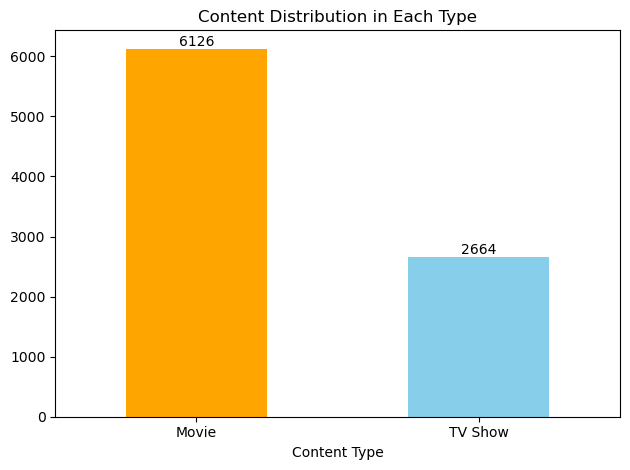

In [15]:
import matplotlib.pyplot as plt

type_counts = df_clnd['type'].value_counts()

bcolors = ['skyblue' if count < type_counts.max() else 'orange' for count in type_counts]
type_counts.plot(kind='bar', color=bcolors)
plt.title('Content Distribution in Each Type')
plt.xlabel('Content Type')
plt.xticks(rotation=0)
plt.tight_layout()

for i,v in enumerate(type_counts):
    plt.text(i, v+1, str(v), ha = 'center', va='bottom')

plt.show()

**Finding/s:**
- Movies dominate the content library of Netflix with over 6,000 titles, more than double the number of TV Shows.
- Netflix appears to prioritize short-form content (movies) over episodic content.
- This may reflect user preferences for quick consumption or Netflix's content acquisition strategy.

**2. How has Netflix's content volume changed over the years?**

In [16]:
df_clnd.groupby(df_clnd['date_added'].dt.year).size()

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
dtype: int64

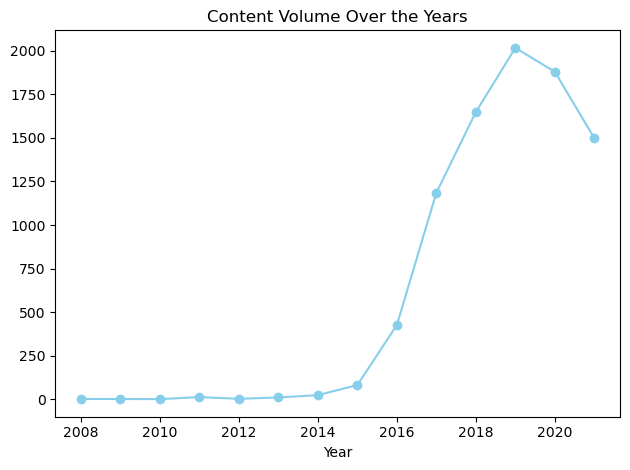

In [17]:
year_counts = df_clnd['date_added'].dt.year.value_counts().sort_index()

year_counts.plot(kind='line', color = 'skyblue', marker = 'o')
plt.title('Content Volume Over the Years')
plt.xlabel('Year')
plt.xticks(rotation = 0)
plt.tight_layout()

plt.show()

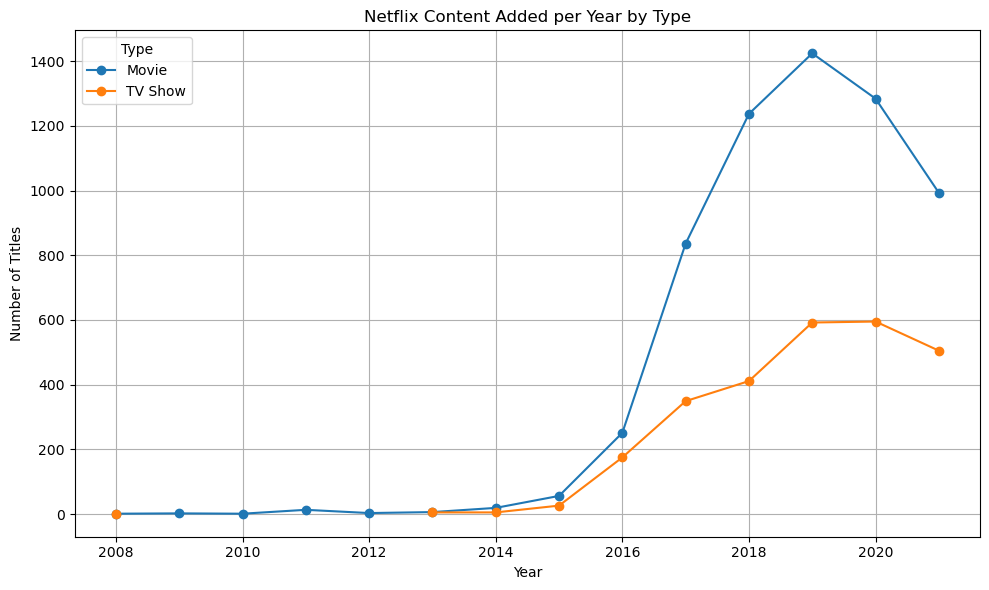

In [18]:
# content distribution per yr
# add year_added column in cleaned df
df_clnd['yr_added'] = df_clnd['date_added'].dt.year

#group by year and type
content_per_yr = df_clnd.groupby(['type', 'yr_added']).size().reset_index(name = 'count')

#pivot the table for better visualization
pivot_df = content_per_yr.pivot(index = 'yr_added', columns = 'type', values = 'count')
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Netflix Content Added per Year by Type')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

**Finding/s:**
- 2016–2019 was Netflix’s hyper-growth period in content acquisition.
- Netflix heavily invested in movie content during its growth phase.
- After peaking in 2019, a strategic slowdown or external constraints, like the pandemic, led to a pullback in new additions in content.
- TV Shows became more stable, possibly reflecting an ongoing push for long-term subscriber engagement through series.

**3. What are the top categories listed across all titles?**

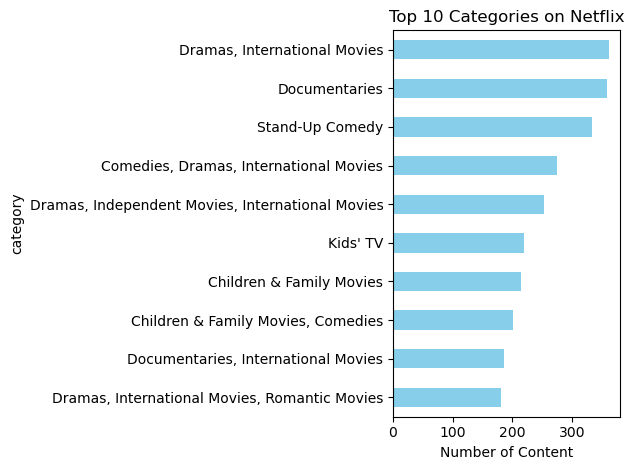

In [19]:
# group by category then get the top record
top_categ = df_clnd.groupby('category').size().sort_values(ascending=False).head(10)

# visualize it
top_categ = top_categ.iloc[::-1]
top_categ.plot(kind='barh', color= 'skyblue')

plt.title('Top 10 Categories on Netflix')
plt.xlabel('Number of Content')
plt.tight_layout()
plt.show()

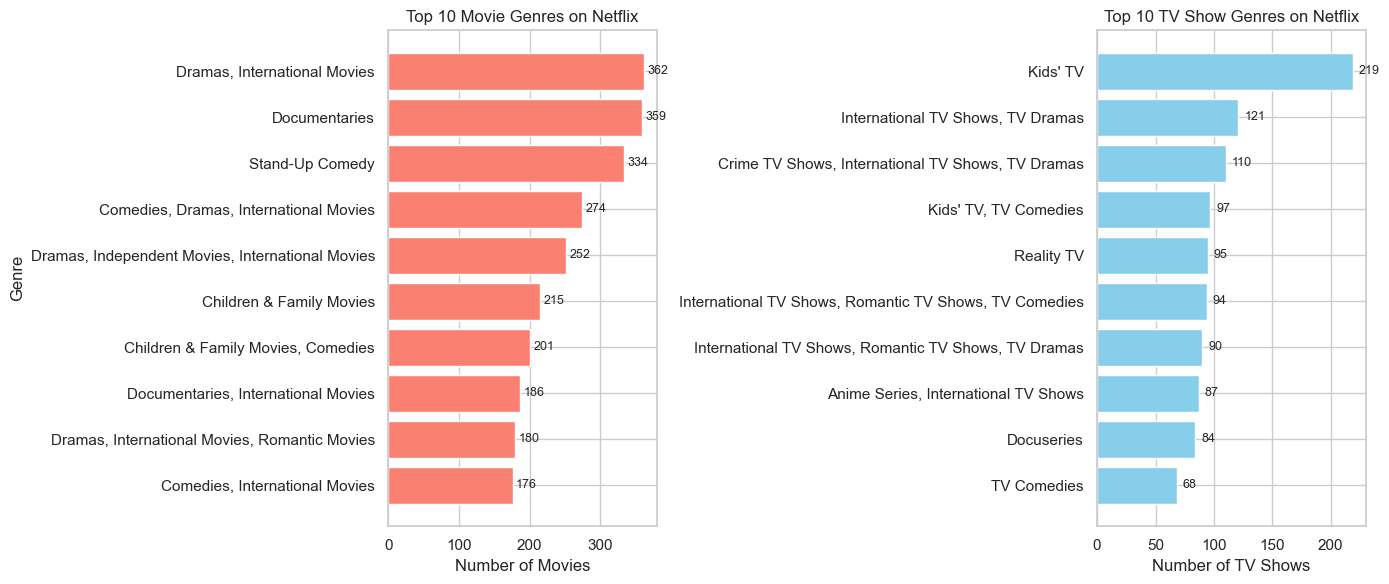

In [20]:
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Movie categories
movies_categ = (
    df_clnd[df_clnd['type'] == 'Movie']
    .groupby('category')
    .size()
    .sort_values(ascending=False)
    .reset_index(name='count')
    .head(10)
    .iloc[::-1]
)

axs[0].barh(movies_categ['category'], movies_categ['count'], color='salmon')
axs[0].set_title('Top 10 Movie Genres on Netflix')
axs[0].set_xlabel('Number of Movies')
axs[0].set_ylabel('Genre')

# Add count annotations (optional but nice)
for i, v in enumerate(movies_categ['count']):
    axs[0].text(v + 5, i, str(v), va='center', fontsize=9)

# TV categories
tv_categ = (
    df_clnd[df_clnd['type'] == 'TV Show']
    .groupby('category')
    .size()
    .sort_values(ascending=False)
    .reset_index(name='count')
    .head(10)
    .iloc[::-1]
)

axs[1].barh(tv_categ['category'], tv_categ['count'], color='skyblue')
axs[1].set_title('Top 10 TV Show Genres on Netflix')
axs[1].set_xlabel('Number of TV Shows')
axs[1].set_ylabel('')

for i, v in enumerate(tv_categ['count']):
    axs[1].text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Finding/s:**
- The category “Dramas, International Movies” is the most common, indicating strong user interest in global and emotionally-driven narratives.
- International content is a recurring theme across several top categories.
- High Demand for Documentaries and Stand-Up Comedy, showing Netflix’s emphasis on informative and entertainment-focused non-fiction content.
- Mixed genres are common, which suggests that Netflix strategically tags content to appeal to wider audiences through hybrid categorization
- In TV Show content, the Kids’ TV category dominates, suggesting a strategic investment in children’s programming, likely to encourage long-term subscriptions from families.
- The top TV genres have lower individual counts compared to movies, suggesting a broader spread of genres among TV content.

**4. Which countries produce the most content available on Netflix?**

In [21]:
import plotly.express as px

#top countries by content
top_countries = df_clnd.groupby('country').size().sort_values(ascending=False).reset_index(name ='count').head(20)
print(top_countries)
# Plotly choropleth
fig = px.choropleth(
    top_countries,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Top 20 Content-Producing Countries on Netflix',
)

fig.update_layout(geo=dict(showframe=True, showcoastlines=True))
fig.show()

                          country  count
0                   United States   2836
1                           India   1026
2                  United Kingdom    423
3                           Japan    251
4                     South Korea    200
5                          Canada    183
6                           Spain    146
7                          France    126
8                           Egypt    113
9                          Mexico    111
10                         Turkey    106
11                        Nigeria    105
12                      Australia     85
13                         Taiwan     82
14                         Brazil     81
15                      Indonesia     80
16                    Philippines     78
17          United States, Canada     75
18  United Kingdom, United States     75
19                        Germany     68


In [22]:
top_countries_movie = df_clnd[df_clnd['type']=='Movie'].groupby(['country']).size().sort_values(ascending=False).reset_index(name ='count').head(10)
top_countries_tv = df_clnd[df_clnd['type']=='TV Show'].groupby(['country']).size().sort_values(ascending=False).reset_index(name ='count').head(10)

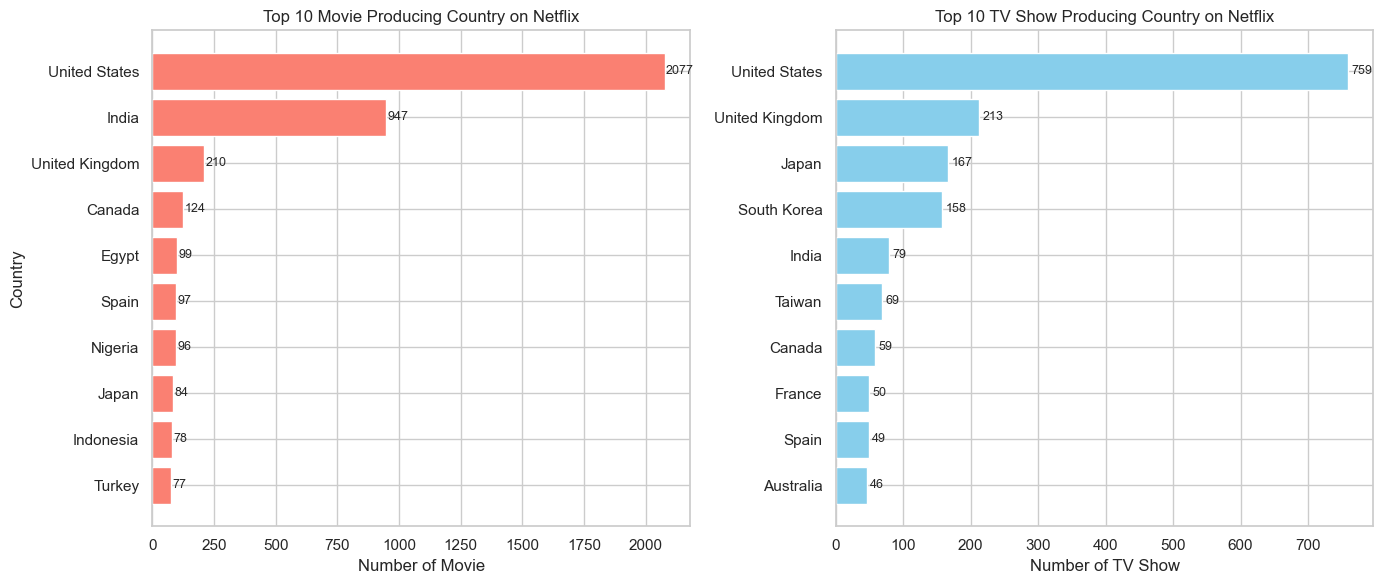

In [23]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols= 2, figsize=(14,6))

top_countries_movie = df_clnd[df_clnd['type']=='Movie'].groupby(['country']).size().sort_values(ascending=False).reset_index(name ='count').head(10).iloc[::-1]

axs[0].barh(top_countries_movie['country'], top_countries_movie['count'], color= 'salmon')
axs[0].set_title('Top 10 Movie Producing Country on Netflix')
axs[0].set_xlabel('Number of Movie')
axs[0].set_ylabel('Country')

for i, v in enumerate(top_countries_movie['count']):
    axs[0].text(v + 5, i, str(v), va='center', fontsize=9)
    
top_countries_tv = df_clnd[df_clnd['type']=='TV Show'].groupby(['country']).size().sort_values(ascending=False).reset_index(name ='count').head(10).iloc[::-1]

axs[1].barh(top_countries_tv['country'], top_countries_tv['count'], color= 'skyblue')
axs[1].set_title('Top 10 TV Show Producing Country on Netflix')
axs[1].set_xlabel('Number of TV Show')
axs[1].set_ylabel('')

for i, v in enumerate(top_countries_tv['count']):
    axs[1].text(v + 5, i, str(v), va='center', fontsize=9)
    
plt.tight_layout()
plt.show()

**Finding/s:**
- United States is by far the largest contributor, with over 2000 movies. This reflects hollywood's strong presence and Netfli'x reliance on American cinema.
- India significantly outpaces the UK in producing movies. Indicates Netflix's deepening investments in Bollywood and regional Indian cinema.
- Countries like Egypt, Nigeria, Indonesia, and Turkey are on the list, despite lower movie output.Suggests that Netflix is expanding regional content to appeal to global audiences.
- United States leads again in TV show production, reflecting American expertise in long-form storytelling and serialized content appeal.
- UK, Japan, and South Korea are also strong contenders in producing series content. Points to Netflix’s aggressive investments in British dramas, anime, and K-dramas — all globally trending genres.
- This analysis emphasizes Netflix's global reach and diversification of content libraries.

**5. What is the distribution of movie durations?**

In [24]:
movies_dur = df_clnd[df_clnd['type']=='Movie'].copy()
movies_dur['duration_mins'] = movies_dur['duration'].str.extract(r'(\d+)').astype(float)

tv_dur = df_clnd[df_clnd['type'] == 'TV Show'].copy()
tv_dur['seasons'] = tv_dur['duration'].str.extract(r'(\d+)').astype(float)

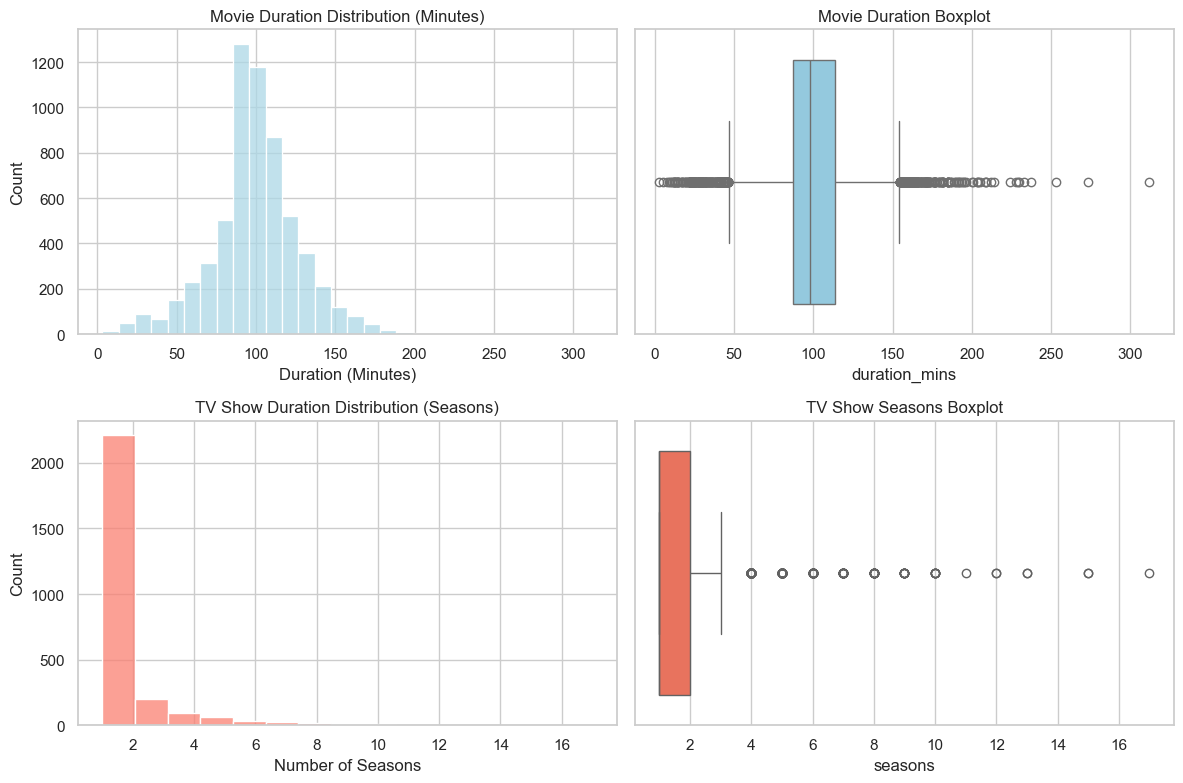

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram - Movie durations
sns.histplot(movies_dur['duration_mins'], bins=30, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Movie Duration Distribution (Minutes)')
axs[0, 0].set_xlabel('Duration (Minutes)')

# Boxplot - Movie durations
sns.boxplot(x=movies_dur['duration_mins'], ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Movie Duration Boxplot')

# Histogram - TV Show seasons
sns.histplot(tv_dur['seasons'], bins=15, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('TV Show Duration Distribution (Seasons)')
axs[1, 0].set_xlabel('Number of Seasons')

# Boxplot - TV Show seasons
sns.boxplot(x=tv_dur['seasons'], ax=axs[1, 1], color='tomato')
axs[1, 1].set_title('TV Show Seasons Boxplot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Finding/s:**
- Typical movie length is around 90–100 minutes.
- Outliers exist on both ends, especially toward longer durations.
- The distribution reflects standard feature-length film durations.


## **Conclusion**
Netflix’s content catalog showcases a diverse, globally-minded, and data-informed strategy. The platform:
- Prioritizes quantity and breadth in its movie catalog to serve varied user tastes.

- Leverages international genres and hybrid tags to increase discoverability and relevance across multiple demographics.

- Invests strategically in region-specific content (e.g., Bollywood, K-dramas, Anime), expanding cultural appeal.

- Shows signs of content consolidation post-2019, possibly transitioning from growth to sustainability.

- Maintains a lean approach to TV content, with many short-lived series potentially designed to test audience traction or manage costs.

## **Recommendations**
**1. Leverage Hybrid Genre Tagging in Recommendations**

**Action**: Continue refining Netflix’s recommendation engine using cross-genre tags

**Benefit**: Increases engagement by surfacing relevant content across user preferences, especially in niche segments.

**2. Strengthen Long-Form TV Series Portfolio**

**Action**: Increase investment in serialized TV content with multiple-season potential, especially in underrepresented genres.

**Benefit**: Enhances long-term viewer retention and increases binge-watching time.

**3. Double Down on Regional Expansion**

**Action**: Expand regional partnerships in fast-growing production hubs like India, Nigeria, and Turkey.

**Benefit**: Localizes content for specific audiences while supporting Netflix’s global footprint and cultural inclusion.

**4. Capitalize on Documentary and Comedy Demand**

**Action**: Accelerate acquisition and production of high-quality documentaries and stand-up specials.

**Benefit**: Meets user demand for intellectually stimulating and lighthearted content, improving content diversity.

**5. Optimize TV Series Lifecycle Management**

**Action**: Use predictive analytics to assess renewal potential early in a series’ life cycle.

**Benefit**: Reduces sunk costs on low-performing series and reallocates budget to proven hits or experimental pilots.